# Performance Assessment D208 - Multiple Regression

#### Ali Zaheer azaheer@wgu.edu

# Part I: Research Question
#### Describe the purpose of this data analysis by doing the following:

#### 1. Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.

Is there a way to predict how much internet bandwidth is used by a customer an year? Can we predict the usage by evaluating related independent variables?

#### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The stakeholders can review the data provided by the analysis and create product plans that are unique to their customer need.

# Part II: Method Justification

#### B.  Describe multiple regression methods by doing the following:

#### 1.  Summarize the assumptions of a multiple regression model.

The assumption is that there will be a linear relationship between the customer independant variables and bandwidth utilization. The Independent variables are not correlated and that 'y' observations are independantly and randomly selected from the population. The Residual is normally distributed.

#### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

I will utilize Python due to my previous interaction with it and its Pandas, matplotlib and Scipy modules. Additionally, I will be using Jupyter notebook as the IDE because it provides a user-friendly experience. Pandas is an excellent package for working with data set as it makes it easy to load and manipulate columns and/or rows to replace null values. Matplotlib plot is an easy way to create graphs for identifying outliers using histograms and/or boxplots.

#### 3.  Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.

Multiple Linear Regression is based on Gaussian distribution to predict continous variables by using the independent variables. It will show whether there is a relationship between the Independent and Dependent variable to predict bandwidth utilization.

#### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

#### Summary Statistics
The average customer age is 53 years old with a standard deviation of 20 years. They have 2 children on average with a standard deviation of 2 kids. Their average income is 39,806 dollars with a standard deviation of 30,000, and they paid a monthly charge of approximately 173 dollars with 4 GBs/year.

I will be using the following independent variables to analyze and predict the future bandwidth usage:

#####  Predictor:
    1. Children
    2. Age
    3. Income
    4. Outage_sec_perweek
    5. Tenure
    6. MonthlyCharge

#####  Target Variable:
    7. Bandwidth_GB_Year

# Part III: Data Preparation

#### C.  Summarize the data preparation process for multiple regression analysis by doing the following:

#### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.


    1. Use Pandas to import the CSV file in the data frame.
    2. Examine and ensure data type consistency in the columns.
    3. Identify and resolve spelling mistakes in column headers or row level data.
    4. Identify and remove outliers
    5. Outliers are identified using Z-score and boxplot graphs.
    6. Validate if the outliers are to be removed or kept
       Identify, Standardize and replaced missing values 
       using central tendency (Mean, Mode or Median)

#### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

1. Import dataset to a DataFrame in Pandas.
2. Review the summary statistics of DataFrame, structure & data types.
3. Remove irrelavent columns from the DataFrame "Customer_id", "zip code".
4. Review univariate & bivariate visualizations.
5. provide a copy of the prepared dataset "prepared_dataset.csv"

In [1]:
import pandas as pd
import jedi
from scipy import stats
import statsmodels.api as sm
import numpy as np

# Visual libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Show all Columns and Rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data set
df = pd.read_csv('churn_clean.csv')

# Amend columns with no names
df = df.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

In [2]:
# Dropping columns that I think are not relavant to the analysis
df = df.drop(columns= ["CaseOrder", "Customer_id", "Interaction", "UID", "City", "State", "DeviceProtection", "Multiple", "Phone",
                            "County",'Job', "Zip", "Lat", "Lng", "Population","Yearly_equip_failure", "Port_modem",
                            "Area", "TimeZone","InternetService","PaymentMethod", "PaperlessBilling", 
                            "Timely_Response","Techie", "Timely_Fixes", "Timely_Replacements","Reliability","Options","Tablet",
                            "Respectful_Response","Marital","OnlineBackup","Courteous_Exchange","Evidence_of_active_listening","Email", "Contacts"
                           ]) 

In [3]:
df.head(5)

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contract,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,Male,No,7.978323,One year,Yes,No,No,Yes,6.795513,172.455519,904.536110
1,1,27,21704.77,Female,Yes,11.699080,Month-to-month,Yes,No,Yes,Yes,1.156681,242.632554,800.982766
2,4,50,9609.57,Female,No,10.752800,Two Year,No,No,No,Yes,15.754144,159.947583,2054.706961
3,1,48,18925.23,Male,No,14.913540,Two Year,Yes,No,Yes,No,17.087227,119.956840,2164.579412
4,0,83,40074.19,Male,Yes,8.147417,Month-to-month,No,Yes,Yes,No,1.670972,149.948316,271.493436


In [4]:
# count of rows and columns
df.shape

(10000, 14)

In [5]:
# Validate there are no nulls
df.isnull().sum()

Children              0
Age                   0
Income                0
Gender                0
Churn                 0
Outage_sec_perweek    0
Contract              0
OnlineSecurity        0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Tenure                0
MonthlyCharge         0
Bandwidth_GB_Year     0
dtype: int64

#### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

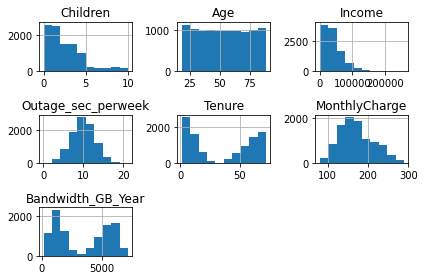

In [6]:
# Univariate visualizations of numerical variables
df.hist()
plt.tight_layout()

In [7]:
# Bivariate visualizations of numerical variables

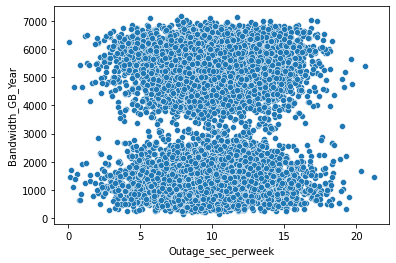

In [8]:
sns.scatterplot(x=df['Outage_sec_perweek'], y=df['Bandwidth_GB_Year'])
plt.show()

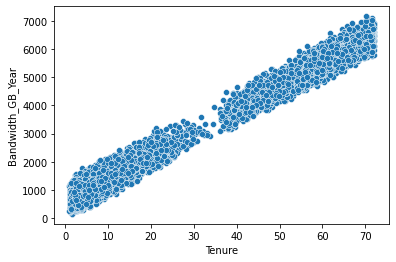

In [9]:
sns.scatterplot(x=df['Tenure'], y=df['Bandwidth_GB_Year'])
plt.show()

Tenure and Bandwidth_GB_Year has a linear relation.

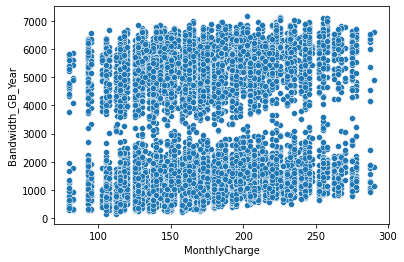

In [10]:
sns.scatterplot(x=df['MonthlyCharge'], y=df['Bandwidth_GB_Year'])
plt.show()

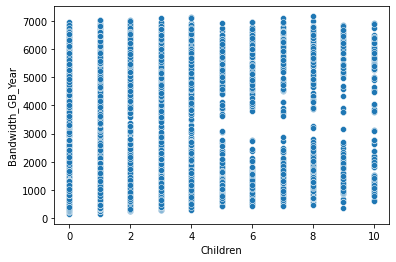

In [11]:
sns.scatterplot(x=df['Children'], y=df['Bandwidth_GB_Year'])
plt.show()

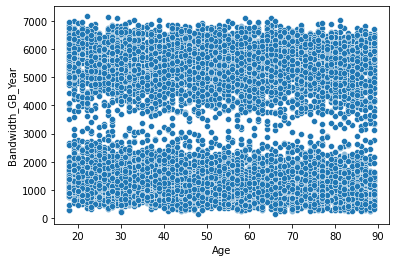

In [12]:
sns.scatterplot(x=df['Age'], y=df['Bandwidth_GB_Year'])
plt.show()

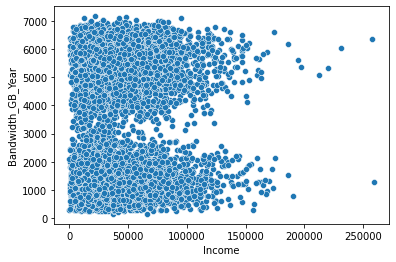

In [13]:
sns.scatterplot(x=df['Income'], y=df['Bandwidth_GB_Year'])
plt.show()

In [14]:
# Summary of the cleaned data frame
df.describe()

,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,71.999280,290.160419,7158.981530


#### 5.  Provide a copy of the prepared data set.

In [15]:
# Prepared dataset in the root folder 'prepared_dataset.csv'
df.to_csv('prepared_dataset.csv')

# Part IV: Model Comparison and Analysis

#### D.  Compare an initial and a reduced multiple regression model by doing the following:
#### 1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.

In [16]:
Initial_model = df.copy()
Initial_model['intercept'] = 1

In [17]:
#df = pd.get_dummies(df)
Initial_model['Gender'] = [1 if v == 'Male' else 0 for v in Initial_model['Gender']]
Initial_model['Churn'] = [1 if v == 'Yes' else 0 for v in Initial_model['Churn']]
Initial_model['Contract'] = [0 if v == 'Month-to-month' else 1 for v in Initial_model['Contract']]
Initial_model['StreamingTV'] = [1 if v == 'Yes' else 0 for v in Initial_model['StreamingTV']]
Initial_model['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in Initial_model['StreamingMovies']]
Initial_model['OnlineSecurity'] = [1 if v == 'Yes' else 0 for v in Initial_model['OnlineSecurity']]
Initial_model['TechSupport'] = [1 if v == 'Yes' else 0 for v in Initial_model['TechSupport']]
Initial_model['OnlineSecurity'] = [1 if v == 'Yes' else 0 for v in Initial_model['OnlineSecurity']]

In [18]:
Initial_model.head(5)

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contract,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,intercept
0,0,68,28561.99,1,0,7.978323,1,0,0,0,1,6.795513,172.455519,904.536110,1
1,1,27,21704.77,0,1,11.699080,0,0,0,1,1,1.156681,242.632554,800.982766,1
2,4,50,9609.57,0,0,10.752800,1,0,0,0,1,15.754144,159.947583,2054.706961,1
3,1,48,18925.23,1,0,14.913540,1,0,0,1,0,17.087227,119.956840,2164.579412,1
4,0,83,40074.19,1,1,8.147417,0,0,1,1,0,1.670972,149.948316,271.493436,1


In [19]:
Initial_model_OLS = sm.OLS(Initial_model["Bandwidth_GB_Year"], 
                      Initial_model[["Children","Age","Churn","Income","Gender","intercept","StreamingTV","Contract","Tenure","OnlineSecurity","TechSupport","Outage_sec_perweek","MonthlyCharge","StreamingMovies"]]).fit()
Initial_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.971e+04
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:16:31   Log-Likelihood:                -67637.
No. Observations:               10000   AIC:                         1.353e+05
Df Residuals:                    9987   BIC:                         1.354e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children              30.4661      0.977     31.173      0.000      28.550      32.382
Age                   -3.3269      0.101    -32.815      0.000      -3.526      -3.128
Churn                110.8947      6.475     17.126      0.000      98.202     123.587
Income                 0.0001   7.44e-05      1.698      0.090   -1.95e-05       0.000
Gender                70.0675      4.203     16.673      0.000      61.830      78.305
intercept            252.2411     14.689     17.172      0.000     223.448     281.034
StreamingTV          164.8631      5.424     30.396      0.000     154.231     175.495
Contract              29.8591      4.482      6.662      0.000      21.074      38.644
Tenure                82.9059      0.095    874.022      0.000      82.720      83.092
OnlineSecurity     -1.441e-14   1.68e-15     -8.581      0.000   -1.77e-14   -1.11e-14
TechSupport            0.1603      4.429      0.036      0.971      -8.522       8.843
Outage_sec_perweek    -0.4181      0.705     -0.593      0.553      -1.800       0.964
MonthlyCharge          0.9660      0.081     11.913      0.000       0.807       1.125
StreamingMovies      134.0143      6.015     22.281      0.000     122.224     145.804
==============================================================================
Omnibus:                    11246.894   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1088.997
Skew:                           0.529   Prob(JB):                    3.37e-237
Kurtosis:                       1.778   Cond. No.                     1.12e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# Feature Selection
X = Initial_model.drop('Bandwidth_GB_Year', axis=1).values
y = Initial_model['Bandwidth_GB_Year']

# Which feature have the most impact on the model
model  = DecisionTreeRegressor()
model.fit(X,y)
fi_col = []
fi = []
for k, v in enumerate(df.drop('Bandwidth_GB_Year', axis=1)):
    #print('{} is {}'.format(v, dt.feature_importances_[k]))
    fi_col.append(v)
    fi.append(model.feature_importances_[k])
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns=['Feature', 'Feature Importance'])
fi_df.sort_values('Feature Importance', ascending= False).reset_index()

,index,Feature,Feature Importance
0,11,Tenure,0.984994
1,12,MonthlyCharge,0.005748
2,1,Age,0.002429
3,5,Outage_sec_perweek,0.001460
4,0,Children,0.001422
5,2,Income,0.001407
6,9,StreamingTV,0.000836
7,10,StreamingMovies,0.000575
8,4,Churn,0.000376
9,3,Gender,0.000359


I am utilizing the classification and regression trees (CART) from the decision tree algorithm to offer scores after being fit, the model provides a ‘feature_importances_’ property that is accessed to retrieve the relative importance scores for each feature.

Based on the above response 'Tenure' is important to prediction.

#### 3.  Provide a reduced multiple regression model that includes both categorical and continuous variables.

In [21]:
Reduced_model = df.copy()
Reduced_model['intercept'] = 1
Reduced_model['Churn'] = [1 if v == 'Yes' else 0 for v in Reduced_model['Churn']]
Reduced_model.drop(columns=["Children","Age","Income","Gender","StreamingTV","Contract","OnlineSecurity","TechSupport","Outage_sec_perweek","MonthlyCharge","StreamingMovies"])

second_model = sm.OLS(Reduced_model["Bandwidth_GB_Year"], 
                      Reduced_model[['Tenure','Churn','intercept']]).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.310e+05
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:16:32   Log-Likelihood:                -70044.
No. Observations:               10000   AIC:                         1.401e+05
Df Residuals:                    9997   BIC:                         1.401e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tenure        84.0214      0.115    728.613      0.000      83.795      84.247
Churn        257.0359      6.909     37.203      0.000     243.493     270.579
intercept    423.2877      5.778     73.255      0.000     411.961     434.614
==============================================================================
Omnibus:                      261.693   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.043
Skew:                           0.277   Prob(JB):                     2.45e-46
Kurtosis:                       2.556   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### E.  Analyze the data set using your reduced multiple regression model by doing the following:
#### 1.  Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:
    •  the logic of the variable selection technique
    •  the model evaluation metric
    •  a residual plot
    
The Initial Model had 13 independent variables and variance of '.991'. When looking at its coefficients I was not able to easily identify which should be dropped based on the P Values. After running the CART algorithm, any column that did not have the feature importance of '.50' was dropped to create the Reduced Model. This model has only one numerical and categorial coefficient from the Initial Model and kept the variance to in the nineties '.985'. 

In [22]:
print('Initial Model AIC: {} compared to Reduced Model {}'.format(Initial_model_OLS.aic,second_model.aic))
print('This proves that the Reduced model is a better fit for the data as the AIC is higher.')

Initial Model AIC: 135299.73413831054 compared to Reduced Model 140094.85669305158
This proves that the Reduced model is a better fit for the data as the AIC is higher.


#### 2.  Provide the output and any calculations of the analysis you performed, including the model’s residual error.

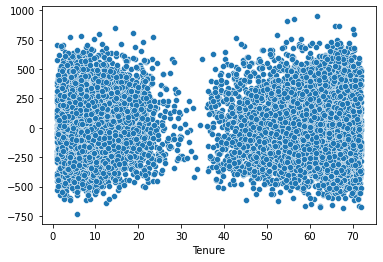

In [23]:
#Residual Plot
df['intercept'] = 1
Residual = Reduced_model['Bandwidth_GB_Year'] - second_model.predict(Reduced_model[['Tenure','Churn','intercept']])
sns.scatterplot(x=Reduced_model['Tenure'], y=Residual)
plt.show()

#### 3.  Provide the code used to support the implementation of the multiple regression models.

Code is provided above

## Part V: Data Summary and Implications
### F.  Summarize your findings and assumptions by doing the following:

#### 1.  Discuss the results of your data analysis, including the following elements:
    •  a regression equation for the reduced model
    •  an interpretation of coefficients of the statistically significant variables of the model
    •  the statistical and practical significance of the model
    •  the limitations of the data analysis

Regression equation for the reduced mode: Bandwidth_GB_Year = 423.28 + (84.02 * Tenure) + (257.03 * Churn).

The 'Tenure' and 'Churn' coefficients have a positive relation with the 'Bandwidth_GB_Year'. Following predictors '"Children","Age","Churn","Income","Gender","intercept","StreamingTV","Contract","Tenure","OnlineSecurity","TechSupport","Outage_sec_perweek","MonthlyCharge","StreamingMovies" were removed as they might not have much impact on the decision-making process.

The model predicts a unit increase of:

- Tenure will increase 'Bandwidth_GB_Year' by '84.02' units
- Churn will increase 'Bandwidth_GB_Year'by '257.03' units

P-values for Tenure and Churn are statistically significant at '0.000' which mean they will have an impact on the 'Bandwidth_GB_Year'.

Limitations: The data is limited to 10,000 rows and having a bigger dataset would provide a deep understanding.

#### 2.  Recommend a course of action based on your results:
There is a direct relationship between the customers time 'Tenure' with the company and bandwidth 'Bandwidth_GB_Year' utilized by them. The stakeholder can now create a profile of the customers that use more bandwidth compared to the rest. This will help them create products that are priced in tiers. After gathering information on a new customer they can be offered the appropriate tier.

### G.  Provide a Panopto video recording that includes all of the following elements:
    •  a demonstration of the functionality of the code used for the analysis
    •  an identification of the version of the programming environment
    •  a comparison of the two multiple regression models you used in your analysis
    •  an interpretation of the coefficients.

Panapto: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7ed19770-988d-45fb-8cb0-ae0d00daab79

# Part VI: Demonstration
#### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

```{bibliography}
Pandas. (2021). Pandas DataFrames. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Get started with references. (2021). Jupyterbook. https://jupyterbook.org/tutorials/references.html#tutorials-references

Marques, A. M. (2020, March 11). How to show all columns / rows of a Pandas Dataframe? Towards Data Science. https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

Starmer, J. (2018, March 5). StatQuest: Logistic Regression. YouTube. https://www.youtube.com/watch?v=yIYKR4sgzI8&t=121s

V. (2019, July 21). Pandas: Apply a function to single or selected columns or rows in Dataframe. ThisPointer. https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/

Wijaya, C. Y. (2021, December 15). 5 Must-Know Dimensionality Reduction Techniques via Prince. Medium. https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1
```

#### I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

```{bibliography}
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

```